# Most Common genres

In [4]:
import os
os.chdir("/Users/admin/Desktop/Goodreads")

print(os.getcwd())

C:\Users\admin\Desktop\Goodreads


In [5]:
import requests
import bs4
import re
import numpy as np
import pandas as pd

In [6]:
page1 = 'https://www.goodreads.com/genres/list?page=1'
page2 = 'https://www.goodreads.com/genres/list?page=2'
page3 = 'https://www.goodreads.com/genres/list?page=3'
page4 = 'https://www.goodreads.com/genres/list?page=4'
page5 = 'https://www.goodreads.com/genres/list?page=5'

In [7]:
req1, req2, req3, req4, req5 = [requests.get(page) for page in [page1, page2, page3, page4, page5]]

In [8]:
type(req1)

requests.models.Response

In [9]:
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
soup1, soup2, soup3, soup4, soup5 = [bs4.BeautifulSoup(page.text, "lxml")
                                    for page in [req1, req2, req3, req4, req5] ]

In [10]:
type(soup1)

bs4.BeautifulSoup

In [11]:
soup1

<!DOCTYPE html>
<html class="desktop">
<head>
<title>Genre shelves</title>
<meta content="Genres on Goodreads. Browse books by 10th-century, 11th-century, 12th-century, 13th-century, 14th-century, 15th-century, 16th-century, 17th-century, 1864..." name="description"/>
<meta content="telephone=no" name="format-detection"/>
<script type="text/javascript">
        if (window.Mobvious === undefined) {
          window.Mobvious = {};
        }
        window.Mobvious.device_type = 'desktop';
        </script>
<script src="https://s.gr-assets.com/assets/webfontloader-032396443d87656441bab7d02193984c.js"></script>
<script>
//<![CDATA[

  WebFont.load({
    classes: false,
    custom: {
      families: ["Lato:n4,n7,i4", "Merriweather:n4,n7,i4"],
      urls: ["https://s.gr-assets.com/assets/gr/fonts-e256f84093cc13b27f5b82343398031a.css"]
    }
  });

//]]>
</script>
<link href="https://s.gr-assets.com/assets/goodreads-4ad2773fb9266e84048001f9f669a13e.css" media="all" rel="stylesheet"/>
<link hr

In [12]:
genreList = []
for soup in [soup1, soup2, soup3, soup4, soup5]:
    for a in soup.find_all('a', href = re.compile("/genres/")): 
        if a.text: 
            genreList.append(a['href'].split("/", 2)[2])

In [13]:
genreList[0:10]

['art',
 'biography',
 'business',
 'children-s',
 'christian',
 'classics',
 'comics',
 'cookbooks',
 'ebooks',
 'fantasy']

In [14]:
len(genreList)

1622

In [15]:
genres = pd.DataFrame(genreList).drop_duplicates(0)

In [16]:
genres.columns = ['tag_name']

In [17]:
genres

,tag_name
0,art
1,biography
2,business
3,children-s
4,christian
...,...
1612,zambia
1613,zen
1614,zimbabwe
1615,zombies


In [19]:
len(genres)

1311

In [20]:
genres.to_csv('genres.csv')

# Scraping Reference User Ratings

In [21]:
import os
os.chdir("/Users/admin/Desktop/Goodreads")
print(os.getcwd())

C:\Users\admin\Desktop\Goodreads


In [22]:
import requests
import bs4
import re
import numpy as np
import pandas as pd

In [23]:
page1 = 'https://www.goodreads.com/review/list/27739335-max?page=1&print=true&shelf=read&view=table'
page2 = 'https://www.goodreads.com/review/list/27739335-max?page=2&print=true&shelf=read&view=table'
page3 = 'https://www.goodreads.com/review/list/27739335-max?page=3&print=true&shelf=read&view=table'
page4 = 'https://www.goodreads.com/review/list/27739335-max?page=4&print=true&shelf=read&view=table'
page5 = 'https://www.goodreads.com/review/list/27739335-max?page=5&print=true&shelf=read&view=table'

In [24]:
req1, req2, req3, req4, req5 = [requests.get(page)
                                for page in [page1, page2, page3, page4, page5]]

In [25]:
soup1, soup2, soup3, soup4, soup5 = [bs4.BeautifulSoup(page.text, "lxml")
                                    for page in [req1, req2, req3, req4, req5] ]

In [26]:
#retrieve title
titlesAll = []
for soup in [soup1, soup2, soup3, soup4, soup5]:
    for a in soup.find_all('a', title = True): 
        if a.text: 
            titlesAll.append(a['title'])

In [28]:
len(titlesAll)

600

In [29]:
#special titles containing only numbers or starting with upper case
titlesRead = []
for word in titlesAll:
    if word[0].isupper() or word[0].isdigit():
        titlesRead.append(word)

In [30]:
titlesRead

['The House of Sleep',
 'The Noise of Time',
 'The Da Vinci Code (Robert Langdon, #2)',
 'Asleep',
 'The Sign of Four (Sherlock Holmes, #2)',
 'The Adventures of Tom Sawyer',
 'The Hound of the Baskervilles',
 'La ragazza di Bube',
 'Crash',
 'Flow My Tears, the Policeman Said',
 'Lost in Music',
 'Things The Grandchildren Should Know',
 'Cocaine Nights',
 'Chronicle of a Death Foretold',
 'The Taming of the Shrew',
 'The Merchant of Venice',
 'Othello',
 "A Midsummer Night's Dream",
 'King Lear',
 'Hamlet',
 'Romeo and Juliet',
 'Savages (Savages #2)',
 'Favorite Poems Of Emily Dickinson',
 'Tales of Mystery and Madness',
 'The Raven and Other Poems',
 'Journey to the Center of the Earth (Extraordinary Voyages, #3)',
 'Twenty Thousand Leagues Under the Sea (Extraordinary Voyages, #6)',
 'Around the World in Eighty Days (Extraordinary Voyages, #11)',
 'Sukkwan Island',
 'The Bishop Murder Case (A Philo Vance Mystery #4)',
 'The Garden Murder Case (A Philo Vance Mystery #9)',
 'Pop. 128

In [31]:
len(titlesRead)

100

To retrieve the ratings,first select all the 'span' tag in the soup, and later select only the element of the deriving list that start with lowercase, so to exclude the dates, which are all uppercase.

In [32]:
ratingsScraped = []
for soup in [soup1, soup2, soup3, soup4, soup5]:
    for a in soup.find_all('span', title = True): 
        if a.text: 
            ratingsScraped.append(a['title'])

In [33]:
ratingsScraped 

['Goodreads Author!',
 'it was amazing',
 'April 15, 2020',
 'really liked it',
 'March 30, 2020',
 'Goodreads Author!',
 'really liked it',
 'March 25, 2020',
 'really liked it',
 'February 29, 2020',
 'really liked it',
 'February 20, 2020',
 'it was amazing',
 'February 14, 2020',
 'it was amazing',
 'February 01, 2020',
 'really liked it',
 'November 04, 2018',
 'liked it',
 'December 29, 2016',
 'it was amazing',
 'December 28, 2016',
 'liked it',
 'December 23, 2016',
 'really liked it',
 'December 23, 2016',
 'really liked it',
 'February 02, 2015',
 'it was amazing',
 'April 21, 2014',
 'liked it',
 'March 15, 2014',
 'really liked it',
 'March 15, 2014',
 'really liked it',
 'March 15, 2014',
 'really liked it',
 'March 15, 2014',
 'really liked it',
 'March 15, 2014',
 'really liked it',
 'March 15, 2014',
 'really liked it',
 'March 15, 2014',
 'Goodreads Author!',
 'liked it',
 'March 14, 2014',
 'really liked it',
 'March 14, 2014',
 'really liked it',
 'March 14, 2014',
 

drop the dates and keep only the actual rating

In [34]:
ratingsGiven = []
for word in ratingsScraped:
    if word[0].islower():
        ratingsGiven.append(word)

In [35]:
ratingsGiven

['it was amazing',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'it was amazing',
 'it was amazing',
 'really liked it',
 'liked it',
 'it was amazing',
 'liked it',
 'really liked it',
 'really liked it',
 'it was amazing',
 'liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'it was amazing',
 'really liked it',
 'really liked it',
 'really liked it',
 'liked it',
 'really liked it',
 'it was amazing',
 'liked it',
 'liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'really liked it',
 'liked it',
 'really liked it',
 'really liked it',
 'it was amazing',
 'really liked it',
 'liked it',
 'it was amazing',
 'really liked it',
 'it was ama

In [36]:
maxRatings = pd.DataFrame(
    {'title': titlesRead,
     'rating': ratingsGiven
    })

In [37]:
maxRatings.head(20)

,title,rating
0,The House of Sleep,it was amazing
1,The Noise of Time,really liked it
2,"The Da Vinci Code (Robert Langdon, #2)",really liked it
3,Asleep,really liked it
4,"The Sign of Four (Sherlock Holmes, #2)",really liked it
5,The Adventures of Tom Sawyer,it was amazing
6,The Hound of the Baskervilles,it was amazing
7,La ragazza di Bube,really liked it
8,Crash,liked it
9,"Flow My Tears, the Policeman Said",it was amazing


In [38]:
pd.crosstab(index = maxRatings['rating'], columns = "count")

col_0,count
rating,
it was amazing,32
liked it,10
really liked it,58


In [39]:
maxRatings['rating'] = maxRatings['rating'].map({'did not like it': 5, 'it was ok': 2, 'liked it' : 3, 'really liked it' : 4, 'it was amazing' : 5})

In [40]:
maxRatings.head(20)

,title,rating
0,The House of Sleep,5
1,The Noise of Time,4
2,"The Da Vinci Code (Robert Langdon, #2)",4
3,Asleep,4
4,"The Sign of Four (Sherlock Holmes, #2)",4
5,The Adventures of Tom Sawyer,5
6,The Hound of the Baskervilles,5
7,La ragazza di Bube,4
8,Crash,3
9,"Flow My Tears, the Policeman Said",5


In [41]:
pd.crosstab(index = maxRatings['rating'], columns = "count")

col_0,count
rating,
3,10
4,58
5,32


In [42]:
maxRatings.to_csv('maxRatings.csv')

# Book Recommendation 

In [1]:
import os
os.chdir("/Users/admin/Desktop/Goodreads")

print(os.getcwd())

C:\Users\admin\Desktop\Goodreads


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from scipy.sparse import csr_matrix

In [3]:
books = pd.read_csv('C:\\Users\\admin\Desktop\Goodreads\\books.csv')
ratings = pd.read_csv('C:\\Users\\admin\Desktop\Goodreads\\ratings.csv')
tags = pd.read_csv('C:\\Users\\admin\Desktop\Goodreads\\tags.csv')
bookTags = pd.read_csv('C:\\Users\\admin\Desktop\Goodreads\\book_tags.csv')
toRead = pd.read_csv('C:\\Users\\admin\Desktop\Goodreads\\to_read.csv')

Books

In [4]:
books.head(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
books.shape

(10000, 23)

In [6]:
len(books.id.unique())

10000

In [7]:
#sort the dataset by average rating, selecting only the most relevant out of the 23 columns
#Book with the highest average rating
books[['id', 'book_id', 'authors', 'title', 'average_rating', 'ratings_count']] \
     .sort_values('average_rating', ascending = False).head(10)

,id,book_id,authors,title,average_rating,ratings_count
3627,3628,24812,Bill Watterson,The Complete Calvin and Hobbes,4.82,28900
3274,3275,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77,33220
861,862,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",4.77,73572
8853,8854,95602,Francine Rivers,Mark of the Lion Trilogy,4.76,9081
7946,7947,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,4.76,8953
4482,4483,24814,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351
6360,6361,70489,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766
421,422,862041,J.K. Rowling,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050
3752,3753,10,J.K. Rowling,"Harry Potter Collection (Harry Potter, #1-6)",4.73,24618
6919,6920,24815,Bill Watterson,The Indispensable Calvin and Hobbes,4.73,14597


Ratings

In [8]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [9]:
ratings.shape 

(981756, 3)

In [10]:
len(ratings.book_id.unique())

10000

In [11]:
len(ratings.user_id.unique()) 

53424

Tags

In [12]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [13]:
len(tags)

34252

In [14]:
len(tags.tag_id.unique())  # There are 34.252 different tags, which means no duplicates

34252

BookTags

In [15]:
bookTags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [16]:
bookTags.shape 

(999912, 3)

In [17]:
len(bookTags.goodreads_book_id.unique())  # As expected, there are 10.000 books in total

10000

In [18]:
len(bookTags.tag_id.unique())

34252

toRead (books that have been flagged as 'to read' by the readers included in the analysis)

In [19]:
toRead.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [20]:
toRead.shape

(912705, 2)

In [21]:
len(toRead.book_id.unique())

9986

In [22]:
len(toRead.user_id.unique())

48871

Adding own personal ratings to the dataset

In [23]:
maxRatings = pd.read_csv('maxRatings.csv')

In [24]:
maxRatings.head()

,Unnamed: 0,title,rating
0,0,The House of Sleep,5
1,1,The Noise of Time,4
2,2,"The Da Vinci Code (Robert Langdon, #2)",4
3,3,Asleep,4
4,4,"The Sign of Four (Sherlock Holmes, #2)",4


In [25]:
maxRatings.shape 

(100, 3)

In [26]:
max(ratings['user_id'])

53424

In [27]:
maxRatings['user_id'] = 55000

In [28]:
maxRatingsWithId = pd.merge(maxRatings, books, on = 'title')
maxRatingsWithId.head()

,Unnamed: 0,title,rating,user_id,id,book_id,best_book_id,work_id,books_count,isbn,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,2,"The Da Vinci Code (Robert Langdon, #2)",4,55000,26,968,968,2982101,350,307277674,...,1447148,1557292,41560,71345,126493,340790,539277,479387,https://images.gr-assets.com/books/1303252999m...,https://images.gr-assets.com/books/1303252999s...
1,5,The Adventures of Tom Sawyer,5,55000,116,24583,24583,41326609,2448,143039563,...,555359,594226,7165,12130,34349,143659,217896,186192,https://images.gr-assets.com/books/1404811979m...,https://images.gr-assets.com/books/1404811979s...
2,6,The Hound of the Baskervilles,5,55000,618,8921,8921,3311984,1717,451528018,...,154517,178563,5421,1098,5204,35369,71857,65035,https://images.gr-assets.com/books/1355929358m...,https://images.gr-assets.com/books/1355929358s...
3,8,Crash,3,55000,7232,70241,70241,68058,81,312420331,...,13217,15187,925,825,1804,3900,5091,3567,https://images.gr-assets.com/books/1281416649m...,https://images.gr-assets.com/books/1281416649s...
4,9,"Flow My Tears, the Policeman Said",5,55000,4326,22584,22584,949696,92,1857983416,...,22063,25396,1187,206,1104,6014,10985,7087,https://images.gr-assets.com/books/1398026028m...,https://images.gr-assets.com/books/1398026028s...


maxRatings dataset to the exact same layout and format as the ratings one

In [29]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [30]:
maxRatingsWithId = maxRatingsWithId[['id', 'user_id', 'rating']] \
                    .rename(columns = {'id' : 'book_id'})

In [31]:
maxRatingsWithId.head()

,book_id,user_id,rating
0,26,55000,4
1,116,55000,5
2,618,55000,5
3,7232,55000,3
4,4326,55000,5


In [32]:
ratings = ratings.append(maxRatingsWithId)

In [33]:
len(ratings.user_id.unique()) 

53425

 erase duplicated ratings from the rating table
 
user-book pairs that have more than 1 rating we will then keep only one record, indicating the average of the given ratings.

In [34]:
userRatesPerBookCount = ratings.groupby(['user_id', 'book_id'], as_index = False).count().sort_values('rating', ascending = False)
userRatesPerBookCount.head(15)

,user_id,book_id,rating
59787,3204,8946,5
665335,34548,7420,4
729574,38259,3996,4
42643,2308,8946,4
81315,4359,2515,4
572,42,8946,4
11033,691,6472,4
95001,5091,8946,4
337052,16979,6059,3
689264,35880,5637,3


In [35]:
ratings[(ratings.user_id == 3204) & (ratings.book_id == 8946)]  

,book_id,user_id,rating
883706,8946,3204,5
883707,8946,3204,5
883708,8946,3204,5
883709,8946,3204,5
883710,8946,3204,4


In [36]:
userRatesPerBookMean = ratings.groupby(['user_id', 'book_id'], as_index = False).mean().round(0).sort_values('rating', ascending = False)
userRatesPerBookMean.head(25)

,user_id,book_id,rating
489771,25096,6903,5.0
218193,11076,6789,5.0
738778,38807,9566,5.0
738779,38808,9895,5.0
387747,19665,7984,5.0
738782,38809,7102,5.0
218196,11076,9913,5.0
218195,11076,8395,5.0
218194,11076,6849,5.0
738784,38809,7935,5.0


In [37]:
userRatesPerBookMean[(userRatesPerBookMean.user_id == 3204) & (userRatesPerBookMean.book_id == 8946)]  

,user_id,book_id,rating
59787,3204,8946,5.0


In [38]:
ratings['count'] = ratings['rating']

userRatesPerBook = ratings.groupby(['user_id', 'book_id'], as_index = False) \
                   .agg({'rating' : 'mean', 'count' : 'count'}) \
                   .rename(columns = {'rating':'mean'}) \
                   .sort_values('count', ascending = False)

ratings = ratings.drop(['count'], axis = 1)
            
userRatesPerBook['mean'] = userRatesPerBook['mean'].round(0)
userRatesPerBook.head()

,user_id,book_id,mean,count
59787,3204,8946,5.0,5
665335,34548,7420,5.0,4
729574,38259,3996,5.0,4
42643,2308,8946,5.0,4
81315,4359,2515,5.0,4


In [39]:
# Now I append the mean and count per each user and book to the ratings table:

ratings = pd.merge(ratings, userRatesPerBook, on = ['user_id', 'book_id'])
ratings.head()

,book_id,user_id,rating,mean,count
0,1,314,5,5.0,1
1,1,439,3,3.0,1
2,1,588,5,5.0,1
3,1,1169,4,4.0,1
4,1,1185,4,4.0,1


In [40]:
ratings.sort_values('count', ascending = False).head(15)

,book_id,user_id,rating,mean,count
883709,8946,3204,5,5.0,5
883707,8946,3204,5,5.0,5
883708,8946,3204,5,5.0,5
883706,8946,3204,5,5.0,5
883710,8946,3204,4,5.0,5
883654,8946,42,5,5.0,4
251241,2515,4359,5,5.0,4
883700,8946,2308,5,5.0,4
883699,8946,2308,5,5.0,4
883698,8946,2308,5,5.0,4


In [41]:
ratings.shape

(981820, 5)

In [42]:
ratings = ratings.drop_duplicates(subset = ['book_id', 'user_id'], keep = 'first', inplace = False)\
                                  .sort_values('count', ascending = False)

In [43]:
ratings.head()

,book_id,user_id,rating,mean,count
883706,8946,3204,5,5.0,5
736954,7420,34548,5,5.0,4
883717,8946,5091,5,5.0,4
399011,3996,38259,5,5.0,4
883697,8946,2308,5,5.0,4


In [44]:
ratings.shape

(979542, 5)

In [45]:
ratings.head()

,book_id,user_id,rating,mean,count
883706,8946,3204,5,5.0,5
736954,7420,34548,5,5.0,4
883717,8946,5091,5,5.0,4
399011,3996,38259,5,5.0,4
883697,8946,2308,5,5.0,4


In [46]:
ratings = ratings.drop(['rating', 'count'], axis = 1)

In [47]:
ratings.head()

,book_id,user_id,mean
883706,8946,3204,5.0
736954,7420,34548,5.0
883717,8946,5091,5.0
399011,3996,38259,5.0
883697,8946,2308,5.0


In [48]:
ratings.shape

(979542, 3)

In [49]:
# I restore the 'ratings' table column names as they were prior to the modification I have made
ratings.columns = ['book_id', 'user_id', 'rating']

In [50]:
ratings.columns

Index(['book_id', 'user_id', 'rating'], dtype='object')

the ratings distribution per users

In [51]:
#users who have rated very few books
ratesPerUser = ratings[['user_id', 'rating']].groupby(['user_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'totalRatings'}) \
                      .sort_values('totalRatings', ascending = False)

ratesPerUser.head(10)

,user_id,totalRatings
30943,30944,200
12873,12874,200
12380,12381,199
52035,52036,199
28157,28158,199
6629,6630,197
45553,45554,197
19728,19729,196
9805,9806,196
15603,15604,196


In [52]:
ratesPerUser.shape

(53425, 2)

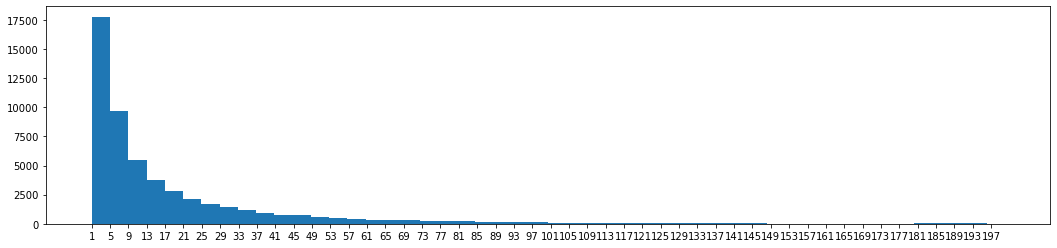

In [53]:
plt.rcParams['figure.figsize'] = [18, 4]   #setting runtime configurations
plt.hist(ratesPerUser['totalRatings'], bins = 50)
plt.xticks(np.arange(min(ratesPerUser['totalRatings']), max(ratesPerUser['totalRatings'])+1, 4.0))
plt.show()

The histogram above shows how many users have rated only 1 to 15 books.

In [54]:
ratings = pd.merge(ratings, ratesPerUser, on = ['user_id'])

In [55]:
ratings.sort_values('totalRatings', ascending = False).head(10)

,book_id,user_id,rating,totalRatings
977816,751,30944,5.0,200
977785,160,30944,4.0,200
488888,2142,12874,3.0,200
488889,2002,12874,2.0,200
488890,2052,12874,2.0,200
488891,407,12874,2.0,200
488892,414,12874,3.0,200
488893,387,12874,2.0,200
488894,402,12874,3.0,200
488895,401,12874,2.0,200


 include only user that have rated at least 20 of the 10K books included in the analysis.

In [56]:
# Keeping only users with more than a 'minimum' of ratings
minimumRatings = ratings.totalRatings <= 20
np.sum(minimumRatings)

272086

In [57]:
ratings = ratings[-minimumRatings]
len(ratings)

707456

In [58]:
len(ratings.user_id.unique())

13972

In [59]:
len(ratings.book_id.unique())

9998

to avoid 'obscure' recommendations of books that only few users have read - to remove books with less than 30 ratings received.

In [60]:
ratesPerBook = ratings[['book_id', 'rating']].groupby(['book_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'receivedRatings'}) \
                      .sort_values('receivedRatings', ascending = False)

ratesPerBook.tail()

,book_id,receivedRatings
9342,9345,2
9855,9858,1
9087,9090,1
8802,8804,1
8371,8372,1


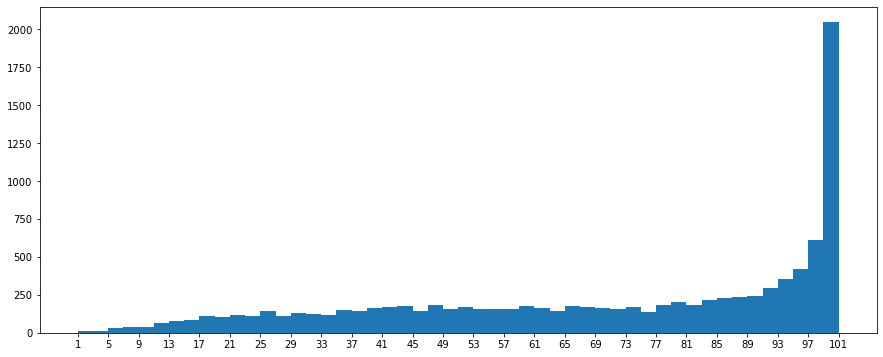

In [61]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.hist(ratesPerBook['receivedRatings'], bins = 50)
plt.xticks(np.arange(min(ratesPerBook['receivedRatings']), max(ratesPerBook['receivedRatings'])+1, 4.0))
plt.show()

In [62]:
ratings = pd.merge(ratings, ratesPerBook, on = ['book_id'])

In [63]:
minimumReceived = ratings.receivedRatings < 30
np.sum(minimumReceived)

21710

In [64]:
ratings = ratings[-minimumReceived]
len(ratings)

685746

In [65]:
len(ratings.user_id.unique())

13971

In [66]:
len(ratings.book_id.unique()) 

8885

In [67]:
ratings.shape

(685746, 5)

#### the top rated books.

In [68]:
# For illustrative purpose, let's first grab author and title for the books dataset:
showingTitles = pd.merge(ratings, books[['id', 'authors', 'title']], how = 'left', left_on = ['book_id'], right_on = ['id'])

In [69]:
topRated = showingTitles.groupby(['book_id'], as_index = False) \
                      .agg({'rating' : 'mean', \
                           'authors': 'first', \
                           'title' : 'first'})
topRated.sort_values('rating', ascending = False).head(10)

,book_id,rating,authors,title
6631,6920,4.806452,Bill Watterson,The Indispensable Calvin and Hobbes
8622,9566,4.800000,Bill Watterson,Attack of the Deranged Mutant Killer Monster S...
5094,5207,4.774648,Bill Watterson,The Days Are Just Packed: A Calvin and Hobbes ...
8237,8978,4.767857,Bill Watterson,The Revenge of the Baby-Sat
4061,4107,4.750000,"Andrew Williamson, Andrew Williamson",Harry Potter: A Pop-Up Book: Based on the Film...
6341,6590,4.750000,Bill Watterson,The Authoritative Calvin and Hobbes: A Calvin ...
7602,8109,4.745763,"Neil Gaiman, Mike Dringenberg, Chris Bachalo, ...","The Absolute Sandman, Volume One"
6142,6361,4.738095,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...
4422,4483,4.738095,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...
3596,3628,4.734694,Bill Watterson,The Complete Calvin and Hobbes


#### "Content-Based" recommendation

In [70]:
showingTagName = pd.merge(bookTags, tags, on = 'tag_id')
showingTagName.sort_values('goodreads_book_id').head(20)

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
258362,1,33165,338,youth
250046,1,17213,347,kindle
246919,1,27535,348,shelfari-favorites
245888,1,16799,351,juvenile
245375,1,18851,354,made-me-cry
240136,1,25151,364,read-in-2015
238876,1,11550,368,favorite-series
237950,1,11491,384,faves
237815,1,32654,386,wizards


In [71]:
mostUsedTags = showingTagName.groupby(['tag_name'], as_index = False) \
                      .agg({'goodreads_book_id' : 'count'}) \
                      .rename(columns = {'goodreads_book_id' : 'number'}) \
                      .sort_values('number', ascending = False)
mostUsedTags.head()

,tag_name,number
30574,to-read,9983
11557,favorites,9881
22743,owned,9858
5207,books-i-own,9799
8717,currently-reading,9776


In [72]:
genres = pd.read_csv('C:\\Users\\admin\Desktop\Goodreads\\genres.csv')
genres.head(10)

,Unnamed: 0,tag_name
0,0,art
1,1,biography
2,2,business
3,3,children-s
4,4,christian
5,5,classics
6,6,comics
7,7,cookbooks
8,8,ebooks
9,9,fantasy


In [118]:
genres.shape

(1311, 2)

In [73]:
genreList = genres['tag_name'].tolist()

In [120]:
len(genreList)    # 1235 genre-tags have been scraped from Goodreads website

1311

In [121]:
len(tags.tag_name.unique()) 

34252

In [74]:
genreTags = tags.loc[tags['tag_name'].isin(genreList)]
len(genreTags) 

850

Then I have merged the bookTags dataset with the genreTags, so that now I have the information of what books in the dataset have been tagged with at least one of the 832 genre-tags used by Goodreads in their genres section.

The idea is then to measure the similarity between each book pair, so that the system will be able to recommend Top-N similar books for any selected title from the ones included in the analysis. In order to be able to properly perform content based filtering, first I have to put all the tags related to one single book in a single string: each tag must be separated from each other with a space, to be accounted as a single word. Then I will perform pairwise similarity scores between books.


In [75]:
mostCommonTags = pd.merge(bookTags, genreTags, on = ['tag_id'])

In [76]:
stringedTags = mostCommonTags.groupby('goodreads_book_id')['tag_name'].apply(lambda x: "%s" % ' '.join(x)).reset_index()

In [77]:
stringedTags.head(20)

,goodreads_book_id,tag_name
0,1,fantasy young-adult fiction magic childrens ad...
1,2,fantasy young-adult fiction magic children-s n...
2,3,fantasy young-adult fiction magic childrens ad...
3,5,fantasy young-adult fiction magic childrens ad...
4,6,fantasy young-adult fiction childrens adventur...
5,8,fantasy young-adult fiction magic childrens ad...
6,10,fantasy young-adult fiction magic childrens ad...
7,11,fantasy young-adult fiction adventure classics...
8,13,fantasy young-adult fiction adventure classics...
9,21,fiction humor adult space science ebooks unfin...


In [78]:
# I go retrieve the author and book information from the book dataset, so that I will be able to actually see
# the title of the book instead of just seeing the id.

stringedTags = pd.merge(stringedTags, books[['book_id', 'authors', 'title']], left_on = ['goodreads_book_id'], \
                       right_on = ['book_id']).drop('book_id', axis = 1)

In [79]:
stringedTags.head(5)

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...
3,5,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...
4,6,fantasy young-adult fiction childrens adventur...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...


Other than the genre-tags,a very important information that we can add to the stringed tag of each book is the author. Including the author will produce a higher similarity score between 2 books written by the same author, which seems reasonable a as someone who likes a book from an author is most likely going to like also other books from the same person.

In [80]:
# First of all, I put everything in lowercase and I remove the space between the name and the surname, to make it count
# as one single word all the time.
stringedTags['authors'] = stringedTags['authors'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))

In [81]:
stringedTags.head(5)

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,"j.k.rowling,marygrandpré",Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,"j.k.rowling,marygrandpré",Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,"j.k.rowling,marygrandpré",Harry Potter and the Sorcerer's Stone (Harry P...
3,5,fantasy young-adult fiction magic childrens ad...,"j.k.rowling,marygrandpré,rufusbeck",Harry Potter and the Prisoner of Azkaban (Harr...
4,6,fantasy young-adult fiction childrens adventur...,"j.k.rowling,marygrandpré",Harry Potter and the Goblet of Fire (Harry Pot...


In [82]:
# With the same operation, I remove the comma between the names as well
stringedTags['authors'] = stringedTags['authors'].astype('str').apply(lambda x: str.lower(x.replace(",", " ")))

In [83]:
stringedTags.head(20)

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré,Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,j.k.rowling marygrandpré,Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré,Harry Potter and the Sorcerer's Stone (Harry P...
3,5,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré rufusbeck,Harry Potter and the Prisoner of Azkaban (Harr...
4,6,fantasy young-adult fiction childrens adventur...,j.k.rowling marygrandpré,Harry Potter and the Goblet of Fire (Harry Pot...
5,8,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré,"Harry Potter Boxed Set, Books 1-5 (Harry Potte..."
6,10,fantasy young-adult fiction magic childrens ad...,j.k.rowling,"Harry Potter Collection (Harry Potter, #1-6)"
7,11,fantasy young-adult fiction adventure classics...,douglasadams,The Hitchhiker's Guide to the Galaxy (Hitchhik...
8,13,fantasy young-adult fiction adventure classics...,douglasadams,The Ultimate Hitchhiker's Guide to the Galaxy
9,21,fiction humor adult space science ebooks unfin...,billbryson,A Short History of Nearly Everything


In [84]:
# Then I add the author(s) to the stringed genre-tags
stringedTags['all_tags'] = stringedTags['tag_name'] + " " + stringedTags['authors']

In [85]:
# A example with one of Harry Potter's series book:
stringedTags.all_tags[1]

'fantasy young-adult fiction magic children-s novels paranormal teen witches urban-fantasy supernatural mystery wizards juvenile romance coming-of-age science-fiction-fantasy boarding-school action british-literature young-adult-fantasy j.k.rowling marygrandpré'

Now I use the 'CountVectorizer' function, that will generate a matrix in which the columns represent all the tag-words that I have included in the analysis and the rows represent the books.

From that matrix (the 'tagMatrix'), I have calculated a similarity score between each book pair, choosing the 'cosine' as a metric of distance.

In [86]:
countVec = CountVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')

In [87]:
tagMatrix = countVec.fit_transform(stringedTags['all_tags'])

In [88]:
tagMatrix

<10000x26752 sparse matrix of type '<class 'numpy.int64'>'
	with 497325 stored elements in Compressed Sparse Row format>

In [89]:
cosineSim = cosine_similarity(tagMatrix, tagMatrix)

In [90]:
cosineSim.shape

(10000, 10000)

In [91]:
cosineSim

array([[1.        , 0.7643608 , 0.92288947, ..., 0.27508955, 0.22356799,
        0.22688611],
       [0.7643608 , 1.        , 0.71674754, ..., 0.26169537, 0.21760561,
        0.20384791],
       [0.92288947, 0.71674754, 1.        , ..., 0.18654789, 0.17572897,
        0.18290983],
       ...,
       [0.27508955, 0.26169537, 0.18654789, ..., 1.        , 0.26258608,
        0.28382836],
       [0.22356799, 0.21760561, 0.17572897, ..., 0.26258608, 1.        ,
        0.76249285],
       [0.22688611, 0.20384791, 0.18290983, ..., 0.28382836, 0.76249285,
        1.        ]])

The next step is retrieving the titles of the books (from the 'stringedTags' dataset, column 'title') and use them as index, so that I can create a function, called 'topRecommendations' that takes in a book title and scores all cosine similarity of that title with each book in the dataset; then - after sorting by the highest similarity and after dropping the first observation (that will show the similarity of the book with itself, which is the maximum valu) it grabs only the first 10 most similar books to that title and return them in the form of a top-10 recommendation.

In [92]:
stringedTags = stringedTags.reset_index()
bookTitles = stringedTags['title']
indices = pd.Series(stringedTags.index, index = bookTitles)

In [93]:
def topRecommendations(title):
    index = indices[title]
    similarityScore = list(enumerate(cosineSim[index]))
    similarityScore = sorted(similarityScore, key = lambda x: x[1], reverse = True)
    similarityScore = similarityScore[1:10]
    bookIndex = [i[0] for i in similarityScore]
    return bookTitles.iloc[bookIndex]

Having a look at few books, it looks like this content-based recommender system is able to capture similarity within books based on the tags I have used, giving interesting and relevant recommendations.

In [94]:
topRecommendations('Harry Potter and the Half-Blood Prince (Harry Potter, #6)').head(10)

3890    Harry Potter and the Deathly Hallows (Harry Po...
2       Harry Potter and the Sorcerer's Stone (Harry P...
1276    Harry Potter and the Chamber of Secrets (Harry...
4       Harry Potter and the Goblet of Fire (Harry Pot...
5686             Harry Potter Boxset (Harry Potter, #1-7)
3       Harry Potter and the Prisoner of Azkaban (Harr...
3488    The Harry Potter Collection 1-4 (Harry Potter,...
5891    Harry Potter and the Order of the Phoenix (Har...
5       Harry Potter Boxed Set, Books 1-5 (Harry Potte...
Name: title, dtype: object

In [95]:
topRecommendations('The Catcher in the Rye').head(10)

350             The Great Gatsby
198        To Kill a Mockingbird
87               Of Mice and Men
4224                  The Chosen
1048         Death of a Salesman
326          The Grapes of Wrath
1209    A Tree Grows in Brooklyn
174      The Old Man and the Sea
714                 The Red Pony
Name: title, dtype: object

In [145]:
topRecommendations('Fear and Loathing in Las Vegas').head(10)

2954          On the Road
5043      The Dharma Bums
1463        The Rum Diary
2236           Ham on Rye
2628          Post Office
2235                Women
5178             Factotum
1653                Junky
839     Desolation Angels
Name: title, dtype: object

In [146]:
topRecommendations('The Great Gatsby').head(10)

405       The Catcher in the Rye
87               Of Mice and Men
1048         Death of a Salesman
440                  Ethan Frome
174      The Old Man and the Sea
326          The Grapes of Wrath
198        To Kill a Mockingbird
1381                The Crucible
354     The Beautiful and Damned
Name: title, dtype: object

In [147]:
topRecommendations('Slaughterhouse-Five').head(10)

4112                        Catch-22
2629              Johnny Got His Gun
3885                    Cat's Cradle
877               A Farewell to Arms
775                     Mother Night
781                        Bluebeard
382           Breakfast of Champions
774     God Bless You, Mr. Rosewater
5423                         Grendel
Name: title, dtype: object

### Item-Based Collaborative Filtering

The starting point of this type of system is a user by book matrix, in which each row indicates a single user, and each columns represents a single book. With the intent of making the table more easy to read and displaying the book titles rather than the book ids, I have used the 'ratingsWithTitles' table.

The resulting userByBook table contains an extremely high number of NAs, due to the fact that - as seen before - even the users who have read the highest number of books in our dataset, they have just read roughly 1% of all the books in the analysis.

In [96]:
ratingsWithTitles = pd.merge(ratings, books[['id', 'title']], left_on = ['book_id'], right_on = ['id'])

In [97]:
userByBook = pd.pivot_table(ratingsWithTitles, index = ['user_id'], columns = ['title'], values = ['rating'])
userByBook

rating                         \
title    Angels (Walsh Family, #3) #GIRLBOSS 'Salem's Lot   
user_id                                                     
7                              NaN       NaN          NaN   
19                             NaN       NaN          NaN   
23                             NaN       NaN          NaN   
27                             NaN       NaN          NaN   
35                             NaN       NaN          NaN   
...                            ...       ...          ...   
53403                          NaN       NaN          NaN   
53409                          NaN       NaN          NaN   
53411                          NaN       NaN          NaN   
53413                          NaN       NaN          NaN   
55000                          NaN       NaN          NaN   

                                                                     \
title   'Tis (Frank McCourt, #2) 1,000 Places to See Before You Die   
user_id                                                               
7                            NaN                                NaN   
19                           NaN                                NaN   
23                           NaN                                NaN   
27                           NaN                                NaN   
35                           NaN                                NaN   
...                          ...                                ...   
53403                        NaN                                NaN   
53409                        NaN                                NaN   
53411                        NaN                                NaN   
53413                        NaN                                NaN   
55000                        NaN                                NaN   

                                                                                                                                       \
title   10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works   
user_id                                                                                                                                 
7                                                      NaN                                                                              
19                                                     NaN                                                                              
23                                                     NaN                                                                              
27                                                     NaN                                                                              
35                                                     NaN                                                                              
...                                                    ...                                                                              
53403                                                  NaN                                                                              
53409                                                  NaN                                                                              
53411                                                  NaN                                                                              
53413                                                  NaN                                                                              
55000                                                  NaN                                                                              

                                                                     \
title   100 Bullets, Vol. 1: First Shot, Last Call 100 Love Sonnets   
user_id                                                               
7                                             

In [98]:
userByBook.shape

(13971, 8854)

In [99]:
# Removing level in columns (user-id)
userByBook.columns = userByBook.columns.droplevel(0)

In [100]:
userByBook.shape

(13971, 8854)

In [ ]:
# Removing level in columns
userByBook.columns = userByBook.columns.droplevel(0)

The goal in item-based collaborative filtering is to score the similarity between book pairs, based on the ratings they have received by the pool of users. To obtain a matrix in which each rows and columns will represent a single book and the values in the matrix represent the similarity between them, I have used the corr() function, which computes pairwise correlation of columns, excluding NA values, using Pearson as default method.

In order to get better recommendations and avoid that not very relevant books will pop up in the Top-N list, I have played with the min_periods parameter within the corr() function, which allows to drop from the correlation computation all the books that are not supported by at least a certain number of people that rated both titles.
I have set the parameter to 50, 40 and 30 with the intent of having a look at the three of them and see which one looks more reliable.

In [ ]:
# Attempt number 2, using min_periods = 50
corrMatrix50 = userByBook.corr(method = 'pearson', min_periods = 50)

In [ ]:
corrMatrix50

In [ ]:
def newRecommendations_50(title):
    bookRating = corrMatrix50[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)

In [ ]:
newRecommendations_50('1984')

In [ ]:
# Attempt number 3, using min_periods = 40
corrMatrix40 = userByBook.corr(method = 'pearson', min_periods = 40)

In [ ]:
def newRecommendations_40(title):
    bookRating = corrMatrix40[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)

In [ ]:
newRecommendations_40('1984')

In [ ]:
# Attempt number 4, using min_periods = 30
corrMatrix30 = userByBook.corr(method = 'pearson', min_periods = 30)

In [ ]:
def newRecommendations_30(title):
    bookRating = corrMatrix30[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)

In [ ]:
newRecommendations_30('1984')

In [ ]:
newRecommendations_40('1984')

In [ ]:
newRecommendations_50('1984')

In [ ]:
newRecommendations_30('Slaughterhouse-Five')

In [ ]:
newRecommendations_40('Slaughterhouse-Five')

In [ ]:
# Increasing the min_periods parameters to 40 and 50, some books don't receive any recommendations because
# there are not enough users in our sample who have rated that book.

newRecommendations_50('Fear and Loathing in Las Vegas')

In [ ]:
newRecommendations_30('Fear and Loathing in Las Vegas')

Given the above results, I have decided to stick with the min_perios = 40 setting, as long as 50 still includes some not satisfying recommendations and 30 remove too many points, not capturing few interesting recommendations.

### Item-based correlation matrix to make recommendations to specific users

Once found the most appropriate way to score similarities between books, I can use the item-based correlation matrix to make recommendations to specific users.

For the purpose of explanation, I have used ratings (user id 55000). First, isolate only the ratings of the books that the user in question has read, storing them as 'myRatings'. Changing user id in 'myRatings' definition and executing the rest of the code with no further modification, will generate recommendations for any other users.

After that, created an empty series in which append all the similar movies to each of the ones that have rated, scaling the value by how well they have rated the specific movie. In order to give more importance to the books that have high correlation with more than one of the books that have been read, they have been summed the correlation values per book. The last two steps before getting the final Top-10 recommendations are to sort by aggregated similarity score and remove from the list the book that have been already read.


In [ ]:
myRatings = userByBook.loc[55000].dropna()
myRatings

In [ ]:
simCandidates = pd.Series()

for i in range(0, len(myRatings.index)):
    sims = corrMatrix40[myRatings.index[i]].dropna()
    sims = sims.map(lambda x: x * myRatings[i])
    simCandidates =  simCandidates.append(sims)

simCandidates.sort_values(inplace = True, ascending = False)
print(simCandidates.head(10))

In [ ]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.head(10)

In [ ]:
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(10)

In [ ]:
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head(10)